## The approach below uses LOOCV to estimate the test error on a classification problem
- This approach uses 1 single element as a test sample and estimates the test set eror by averaging misclassification over the entire Data set

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
import seaborn as sns
from sklearn import *

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [2]:
df = pd.read_csv("weekly.csv")

In [3]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### Dataset description
#### Data set depicts the % returns for the S&P 500 stock index for 1089 weeks
**Variable** | **__ Description__** |** Type**
---|---|---
Lag1-Lag5|% return for each of the 5 trading weeks|float
Volume| Number of shares traded(billions)|float
Today|% return on the date in question|float
Direction|Denotes wheter the market was Up or Down on the date|Qualitative


- Direction is the response variable

In [18]:
#df.iloc[[2]]
temp = 
temp

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down
10,1990,-2.678,1.253,0.041,0.807,-1.372,0.149024,-1.793,Down


In [28]:
X.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178


In [32]:
# Changing the response variable to numeric(binary classification)
df.loc[(df.Direction=='Up') , 'Direction'] = 1
df.loc[(df.Direction=='Down') , 'Direction'] = 0

# Creating predictor and response variables
y = df.Direction
X = df.drop(['Direction','Year','Lag3','Lag4','Lag5','Volume','Today'] , axis =1 )

y = pd.to_numeric(y)

In [62]:
# The loop below creates a validation and test set to get the estimates of the error
error_count = 0   # this would hold the number of misclassified samples
error_ind = []    # this would hold the index of misclassified sample

for i in range(0,len(df)):
    
    test_X = X.iloc[[i]]   # The test_df contains the test set that has been held out to estimate the error
    test_y = y.iloc[i]
    
    train_X = X.drop(X.index[[i]]) # dropping the ith column from the training data
    train_y = y.drop(y.index[i]) # dropping the ith column from the training data
    
    model_logit = linear_model.LogisticRegression().fit(train_X , train_y)
    y_hat_test = model_logit.predict(test_X )   #calculating the predicted value
    
    if (y_hat_test == test_y):
        continue
    else:
        error_count += 1
        error_ind.append(i)
    
        
    
    
    

In [56]:
print " The Test accuracy is %r" %(error_count*100/(len(df)))

 The Test accuracy is 44


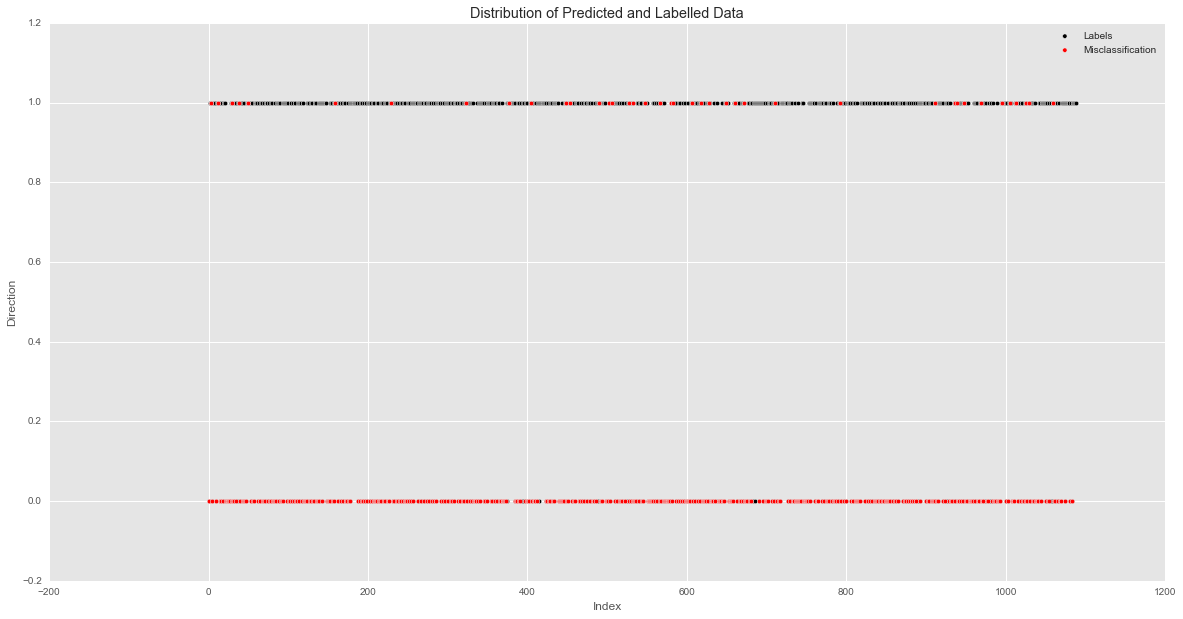

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(x = df.index, y = df.Direction, c='k' , label = 'Labels')
plt.scatter(x = error_ind, y = df.Direction[error_ind] , c = 'r' , label = 'Misclassification')
plt.legend(loc = 'best')
plt.xlabel('Index')
plt.ylabel('Direction')
plt.title('Distribution of Predicted and Labelled Data')

### Conclusion
    - LOOCV estimates that the model would predict an accuracy of 44% on Test data
    - This model/error estimate would likely to misclasify the instances when the Market is going down but would on an avg , correctly predict the instances when the Market is likely to go up
